In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
%run fix_paths.ipy

Populating the interactive namespace from numpy and matplotlib
/home/liux13/srp/srp-boxes


In [2]:
from glob import glob
import os
from srp.config import C
import pandas as pd

/home/liux13/anaconda3/envs/srp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
experiment_root =os.path.join(C.DATA, 'experiments')

roots = [exp for exp in os.listdir(experiment_root) if not exp.startswith(('.', '_'))]

In [58]:
fusion_root = 'data/experiments/fusion/'
obb_root = 'data/experiments/obb/'
synthetic_root = 'data/experiments/synthetic/'
cdrop_root = 'data/experiments/cdrop/'
regression_root = 'data/experiments/regression_loss/'

In [5]:
def check_progress():
    files = glob(os.path.join(experiment_root, '*/*/*.csv'))
    print ("{} files in total".format(len(files)))
    notdone = []
    for f in files:
        df = pd.read_csv(f)
        if len(df.columns) == 12:
            doness = 'done'
        else:
            notdone.append(f)
            doness = 'NOPE!'
        #print ("{} \t {}".format(f, doness))
    print("{} to go.".format(len(notdone)))
    return notdone

In [6]:
notdone = check_progress()

25 files in total
0 to go.


In [7]:
def output_mean_variance_table(root):
    index_label = []
    rows = []
    col_names = None
    for subdir in os.listdir(root):
        
        if subdir.startswith(('.', '_')):
            continue
        index_label.append(subdir)
        csvs = glob(os.path.join(root, subdir, '*.csv'))
        
        metrics = []
        for csv in csvs:
            
            if not col_names:
                col_names = pd.read_csv(csv).columns[1:].tolist()
            
            history = pd.read_csv(csv)
            metrics.append(history.iloc[len(history)-5, 1:].values)
            # print (index_label)
        mean = np.mean(metrics, axis=0)
        std = np.std(metrics, axis=0)
        rows.append(["{:.3f}±{:.3f}".format(m,s) for (m, s) in zip(mean, std)])
    return pd.DataFrame(data=np.array(rows), columns=col_names, index=index_label)   

In [9]:
pd.read_csv('/home/liux13/srp/srp-boxes/results_c1r1/summary_fusion_c1r1.csv')

,Unnamed: 0,epoch,trn_loss,val_loss,f_2,accuracy,precision,recall,f_1,iou,L_1,L_2
0,late_add,31.400±6.151,2.879±0.489,2.461±0.275,0.970±0.046,0.976±0.032,0.992±0.009,0.966±0.057,0.978±0.029,0.447±0.027,1.667±0.374,0.295±0.047
1,early,27.400±10.984,2.782±0.841,2.774±0.844,0.986±0.004,0.981±0.009,0.973±0.017,0.990±0.004,0.981±0.009,0.409±0.145,1.946±0.614,0.336±0.080
2,late_cat,14.200±4.400,4.355±0.045,4.532±0.370,0.954±0.023,0.966±0.019,0.990±0.013,0.945±0.027,0.967±0.017,0.189±0.060,2.769±0.256,0.454±0.030


In [99]:
output_mean_variance_table(os.path.join(experiment_root, roots[1]))

,epoch,trn_loss,val_loss,f_2,accuracy,precision,recall,f_1,iou,L_1,L_2
vector_and_width,29.800±12.139,2.623±0.915,2.616±0.942,0.972±0.025,0.970±0.015,0.968±0.030,0.974±0.035,0.970±0.015,0.447±0.183,1.626±0.773,0.287±0.114
four_points,39.200±1.939,1.843±0.092,1.781±0.229,0.988±0.004,0.979±0.014,0.962±0.032,0.995±0.005,0.978±0.015,0.573±0.027,1.045±0.101,0.199±0.017
two_vectors,27.800±8.232,2.639±0.698,2.475±0.674,0.989±0.009,0.980±0.023,0.969±0.046,0.994±0.005,0.981±0.023,0.481±0.112,1.635±0.525,0.288±0.078


In [64]:
output_mean_variance_table(os.path.join(experiment_root, roots[2]))

/home/liux13/anaconda3/envs/srp/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/liux13/anaconda3/envs/srp/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/liux13/anaconda3/envs/srp/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/liux13/anaconda3/envs/srp/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/liux13/anaconda3/envs/srp/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TypeError: zip argument #1 must support iteration

In [101]:
output_mean_variance_table(os.path.join(experiment_root, roots[3]))

,epoch,trn_loss,val_loss,f_2,accuracy,precision,recall,f_1,iou,L_1,L_2
pretrain,26.000±11.225,3.209±2.134,3.469±2.591,0.870±0.218,0.878±0.172,0.771±0.329,0.995±0.009,0.814±0.293,0.445±0.221,2.394±2.490,0.390±0.335
no_pretrain,33.600±6.437,2.149±0.392,2.147±0.400,0.992±0.004,0.989±0.009,0.982±0.020,0.995±0.004,0.988±0.009,0.551±0.053,1.263±0.212,0.239±0.041


In [102]:
output_mean_variance_table(os.path.join(experiment_root, roots[4]))

,epoch,trn_loss,val_loss,f_2,accuracy,precision,recall,f_1,iou,L_1,L_2
smooth_L1,31.400±10.557,2.490±0.647,2.387±0.697,0.984±0.009,0.979±0.002,0.972±0.015,0.987±0.015,0.979±0.002,0.492±0.123,1.462±0.504,0.258±0.074
L2,31.400±9.243,2.412±0.697,2.414±0.569,0.979±0.017,0.983±0.009,0.991±0.010,0.976±0.022,0.983±0.009,0.485±0.104,1.531±0.464,0.274±0.074


In [53]:
def output_folds_table(root):
    
    csvs = glob(os.path.join(root, '*/*.csv'))
    useful_cols = pd.read_csv(csvs[0]).columns[1:].tolist()

    rows = []
    index_label = []
    for exp in csvs:
        history = pd.read_csv(exp)
        assert history.columns[1:].tolist() == useful_cols
        rows.append(history.iloc[len(history)-5, 1:].values)
        index_label.append(os.path.basename(os.path.dirname(exp))+'_'+os.path.basename(exp)[-5:-4])
    assert len(useful_cols) == len(rows[0])

    return pd.DataFrame(data=np.array(rows), columns=useful_cols, index=index_label)

In [57]:
output_folds_table(os.path.join(experiment_root, roots[0]))

,epoch,trn_loss,val_loss,f_2,accuracy,precision,recall,f_1,iou,L_1,L_2
cdrop_5,48.0,1.870466,1.693380,0.989160,0.992481,1.000000,0.986486,0.993197,0.596992,1.326954,0.216282
cdrop_2,15.0,3.718910,3.700493,0.968064,0.972500,0.979798,0.965174,0.972431,0.249385,2.440854,0.417008
cdrop_3,33.0,2.155749,1.974926,0.982906,0.982500,0.978723,0.983957,0.981333,0.582010,1.014581,0.201147
cdrop_4,35.0,2.253090,2.215255,0.995526,0.997500,1.000000,0.994413,0.997199,0.542723,1.096989,0.244345
cdrop_1,31.0,2.495737,2.769975,0.968354,0.937656,0.859551,1.000000,0.924471,0.470980,1.345571,0.244038
no_cdrop_5,38.0,1.938936,1.856591,0.971680,0.964912,0.956731,0.975490,0.966019,0.567115,1.231291,0.225288
no_cdrop_2,35.0,1.939059,1.823423,0.976268,0.975000,0.967914,0.978378,0.973118,0.598810,0.890082,0.185377
no_cdrop_3,26.0,2.699242,2.497524,0.987433,0.980000,0.973451,0.990991,0.982143,0.407718,1.941529,0.306199
no_cdrop_4,33.0,1.951847,2.104337,0.998959,0.997500,0.994819,1.000000,0.997403,0.554781,1.316731,0.236593
no_cdrop_1,25.0,2.785723,2.498695,0.995261,0.987531,0.976744,1.000000,0.988235,0.444972,1.669332,0.277943


In [13]:
results_root = '/home/liux13/srp/srp-boxes/results_c1r1/'

raw_folds = []
mean_variance = []
for csv_path in glob(os.path.join(results_root, "*.csv")):
    basename = os.path.basename(csv_path)
    if basename.startswith('folds'):
        raw_folds.append(csv_path)
    else:
        mean_variance.append(csv_path)
    
assert len(raw_folds) == len(mean_variance)

In [11]:
C.EXPERIMENT

{'FUSION': 'early',
 'OBB_PARAMETRIZATION': 'vector_and_width',
 'SYNTHETIC': 'no_pretrain',
 'CHANNEL_DROPOUT': 'cdrop',
 'CLASS_LOSS': 'xent_loss',
 'REGRESSION_LOSS': 'smooth_L1',
 'AUG_JITTER': 'no_jitter'}

In [31]:
df = pd.read_csv(raw_folds[0])
for csv in raw_folds[1:]:
    df = df.append(pd.read_csv(csv))

/home/liux13/srp/srp-boxes/results_c1r1/folds_synthetic_c1r1.csv
/home/liux13/srp/srp-boxes/results_c1r1/folds_cdrop_c1r1.csv
/home/liux13/srp/srp-boxes/results_c1r1/folds_regression_loss_c1r1.csv
/home/liux13/srp/srp-boxes/results_c1r1/folds_obb_c1r1.csv


In [65]:
defaults = ('early', 'vector_and_width', 'no_pretrain', 'cdrop', 'smooth_L1')

In [75]:
df.columns = ['experiment', 'epoch', 'trn_loss', 'val_loss', 'f_2', 'accuracy',
       'precision', 'recall', 'f_1', 'iou', 'L_1', 'L_2']

In [106]:
df.index = range(len(df))

In [111]:
def by(idx):
    # print (idx)
    param = df.iloc[idx]['experiment'][:-2]
    if param in defaults:
        return 'default'
    else:
        # print(param)
        return param

In [117]:
means = df.groupby(by=by).mean()

stds = df.groupby(by=by).std()

In [130]:
stds['epoch']

L2             10.334409
default        10.754534
four_points     2.167948
late_add        6.877500
late_cat        4.919350
no_cdrop        5.683309
pretrain       12.549900
two_vectors     9.203260
Name: epoch, dtype: float64

In [135]:
means.index.tolist()

['L2',
 'default',
 'four_points',
 'late_add',
 'late_cat',
 'no_cdrop',
 'pretrain',
 'two_vectors']

In [141]:
assert means.columns.tolist() == stds.columns.tolist()
assert means.index.tolist() == stds.index.tolist()

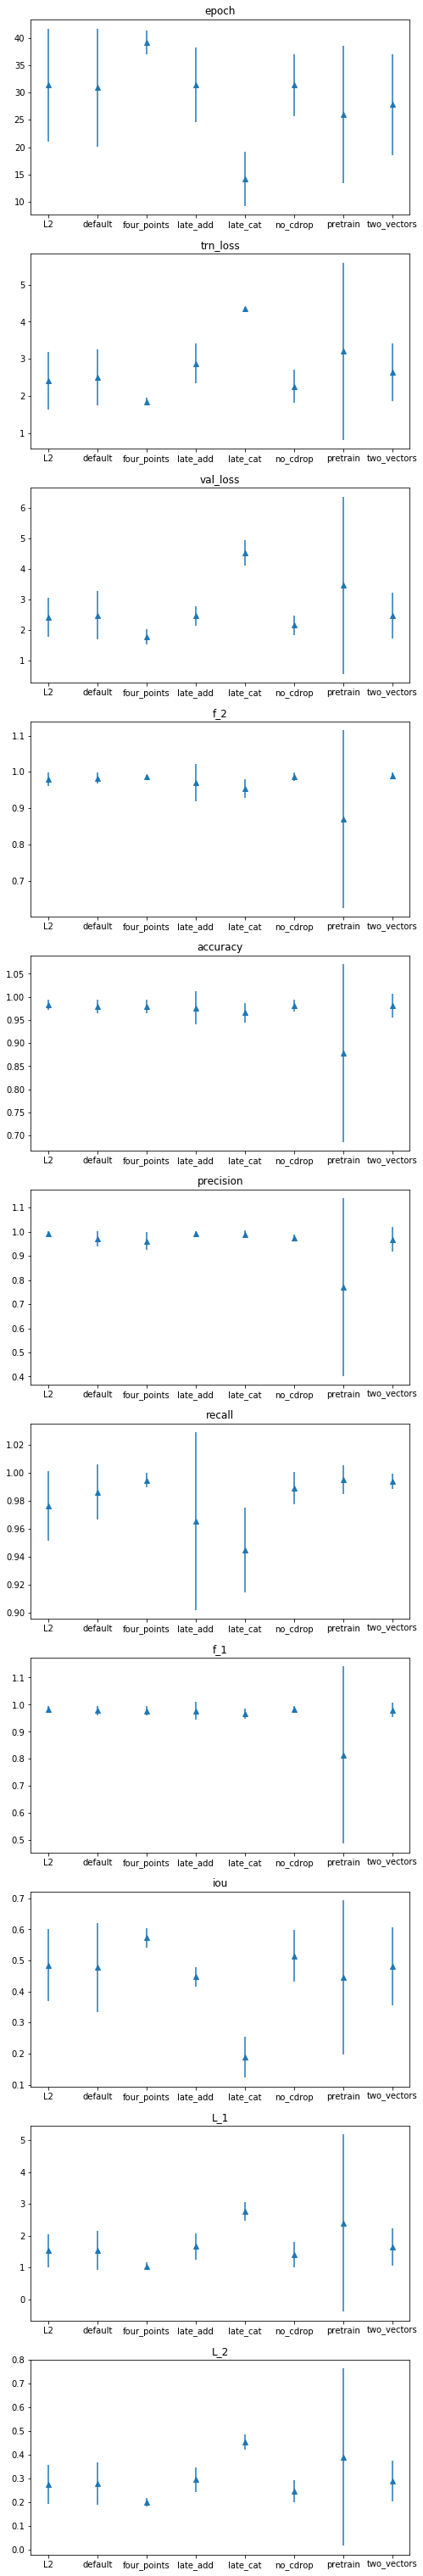

In [155]:
figsize(8, len(means.columns.tolist()) * 5)
for row, att in enumerate(means.columns.tolist()):
    ax = plt.subplot(len(means.columns.tolist()),1,row+1)
    ax.set_title(att)
    
    plt.errorbar(means.index.tolist(), means[att], stds[att], linestyle='None', marker='^')